#TRABAJO PRÁCTICO 1 - VISUALIZACIONES NO ORIGINALES
 - Alumno: Daniela Ojeda.
 - Padrón: 107690.
 - Cuatrimestre: 1C2023.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##HISTOGRAMA

In [ ]:
df_dengue_casos = pd.read_csv('/content/drive/MyDrive/dengue_labels_train.csv')
df_dengue_datos = pd.read_csv('/content/drive/MyDrive/dengue_features_train.csv')
df_merge = pd.merge(df_dengue_casos, df_dengue_datos, on=['year', 'weekofyear', 'city'])
df_merge

,city,year,weekofyear,total_cases,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,4,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,5,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,4,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,3,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,6,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,2010,21,5,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,...,45.00,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0
1452,iq,2010,22,8,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,...,207.10,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6
1453,iq,2010,23,1,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,...,50.60,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4
1454,iq,2010,24,1,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,...,62.33,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0


Text(0, 0.5, 'Cantidad de casos de dengue')

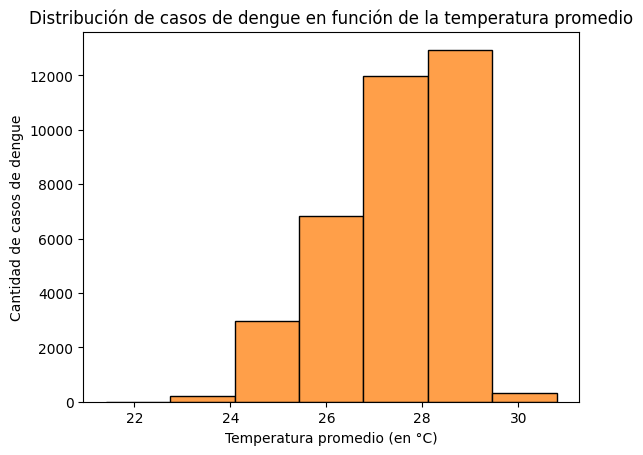

In [ ]:
n,bins,patches = plt.hist(df_merge['station_avg_temp_c'], edgecolor='black',weights=df_merge['total_cases'],bins=7,color='#ff9f49')
plt.title('Distribución de casos de dengue en función de la temperatura promedio')
plt.xlabel('Temperatura promedio (en °C)')
plt.ylabel('Cantidad de casos de dengue')

##BOXPLOT

In [ ]:
df_dengue_casos = pd.read_csv('/content/drive/MyDrive/dengue_labels_train.csv')
df_dengue_casos_filtrado = df_dengue_casos.loc[(df_dengue_casos['year'] >= 2000)  & (df_dengue_casos['year'] <= 2005)]
df_dengue_casos_filtrado

,city,year,weekofyear,total_cases
503,sj,2000,52,17
504,sj,2000,1,16
505,sj,2000,2,23
506,sj,2000,3,18
507,sj,2000,4,18
...,...,...,...,...
1217,iq,2005,47,3
1218,iq,2005,48,7
1219,iq,2005,49,11
1220,iq,2005,50,2


Text(0.5, 1.0, 'Distribución de casos de dengue por año (2000-2005)')

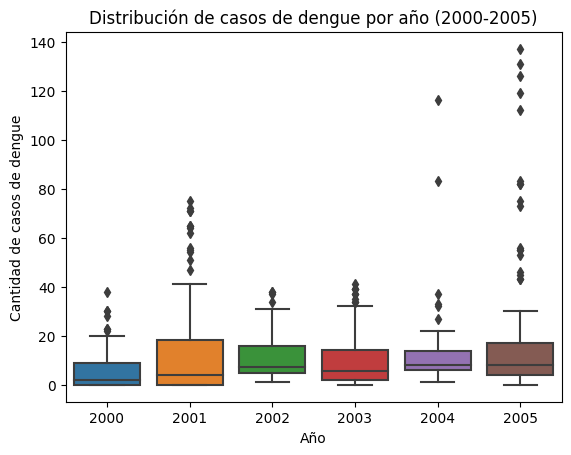

In [ ]:
sns.boxplot(x='year', y='total_cases', data=df_dengue_casos_filtrado)
plt.xlabel('Año')
plt.ylabel('Cantidad de casos de dengue')
plt.title('Distribución de casos de dengue por año (2000-2005)')

##HEATMAP

In [ ]:
df_h1n1 = pd.read_csv('/content/drive/MyDrive/test_set_features.csv')
matriz = df_h1n1.pivot_table(values='opinion_h1n1_vacc_effective', index='education', columns='race', aggfunc='mean').fillna(0)
matriz = matriz.rename(index={'12 Years': 'Completed Secondary', '< 12 Years': 'Over Completed Secondary'})
matriz

race,Black,Hispanic,Other or Multiple,White
education,,,,
Completed Secondary,3.741176,3.883610,3.875000,3.803680
Over Completed Secondary,3.661157,3.904139,4.014184,3.713553
College Graduate,3.837413,3.817919,3.920068,3.981488
Some College,3.711667,3.665730,3.760599,3.798666


Text(77.92222222222226, 0.5, 'Nivel de educación')

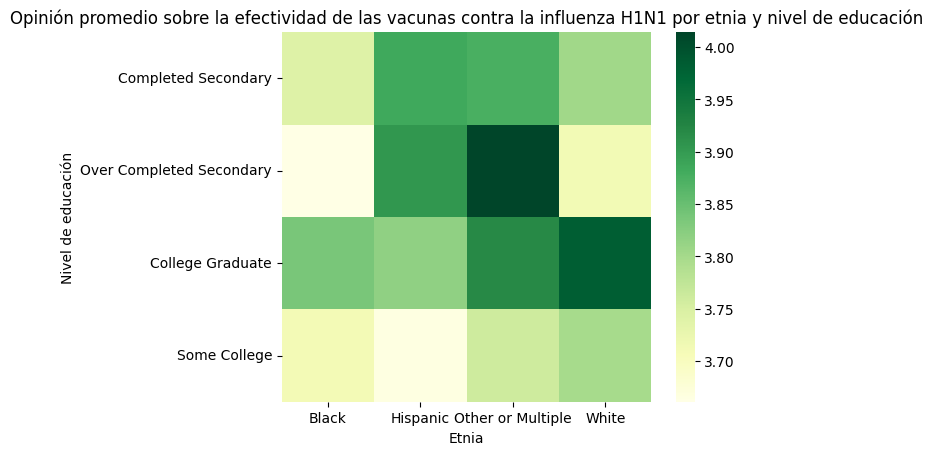

In [ ]:
plt.title("Opinión promedio sobre la efectividad de las vacunas contra la influenza H1N1 por etnia y nivel de educación")
sns.heatmap(matriz, square=True, cmap='YlGn')
plt.xlabel("Etnia")
plt.ylabel("Nivel de educación")